In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
ns2b = []
ns2bd = []
       
f = open("../../../../../../Data/Proteins/DENV3/NS2B/DENV3_NS2B.txt", "r")
for x in f:
    if "DSS" in x:
        ns2bd.append(1)
    elif "DHF" in x:
        ns2bd.append(1)
    elif x[0] == ">":
        ns2bd.append(0)
    else:
        x = x.replace("\n", "")
        ns2b.append(x)

In [3]:
# Converting the arrays into DataFrames
ns2b = pd.DataFrame(ns2b)

# Attaching the "Disease" label column to the inpu
ns2b["Disease"] = ns2bd

# Renaming the columns
ns2b = ns2b.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
print("The combined shape of the given data is:", str(ns2b.shape))
print("The length of the combined data is:", str(len(ns2b.index)))
print("Does the combined data have any null value? ->", ns2b.isnull().values.any())

ns2b = ns2b.dropna(how = 'any',axis = 0) 

# Shuffling the data and then taking a peek
ns2b = ns2b.sample(frac = 1)
print(ns2b.head())

The combined shape of the given data is: (472, 2)
The length of the combined data is: 472
Does the combined data have any null value? -> False
                                              Sequence  Disease
199  SWPLNEGVMAVGLVSILASSLLRNDVPMAGPLVAGGLLIACYVITG...        0
2    SWPLNEGVMAVGLVSILASSLLRNDVPMAGPLVAGGLLIACYVITG...        0
332  SWPLNEGVMAVGLVSILASSLLRNDVPMAGPLVAGGLLIACYVITG...        0
150  SWPLNEGVMAVGLVSILASSLLRNDVPMAGPLVAGGLLIACYVITG...        0
297  SWPLNEGVMAVGLVSILASSLLRNDVPMAGPLVAGGLLIACYVITG...        0


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]

ns2b['words'] = ns2b.apply(lambda x: getKmers(x['Sequence']), axis=1)
ns2b = ns2b.drop('Sequence', axis=1)

ns2b_texts = list(ns2b['words'])
for item in range(len(ns2b_texts)):
    ns2b_texts[item] = ' '.join(ns2b_texts[item])

The shape of y is: (472,)


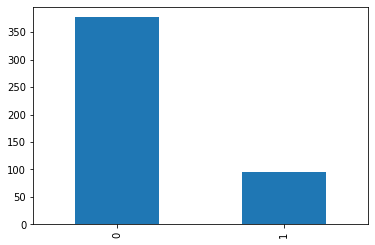

In [6]:
# Creating y and printing the shape of it
y = ns2b.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
ns2b["Disease"].value_counts().sort_index().plot.bar()

In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
x = cv.fit_transform(ns2b_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (472, 348)


In [8]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Printing the shapes of the train and test matrices
print("The shape of x_train is:", X_train.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of x_test is:", X_test.shape)
print("The shape of y_test is:", y_test.shape)

The shape of x_train is: (377, 348)
The shape of y_train is: (377,)
The shape of x_test is: (95, 348)
The shape of y_test is: (95,)


## SVM

In [9]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, C = 0.0001)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = {} \nprecision = {} \nrecall = {} \nf1 = {}".format(accuracy, precision, recall, f1))

Confusion matrix

Predicted   0
Actual       
0          77
1          18
accuracy = 0.8105263157894737 
precision = 0.6569529085872575 
recall = 0.8105263157894737 
f1 = 0.725703794369645


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
